In [15]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re
df = pd.read_csv('bestsellers with categories.csv')

Seaborn verion 0.10.1


In [2]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [3]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


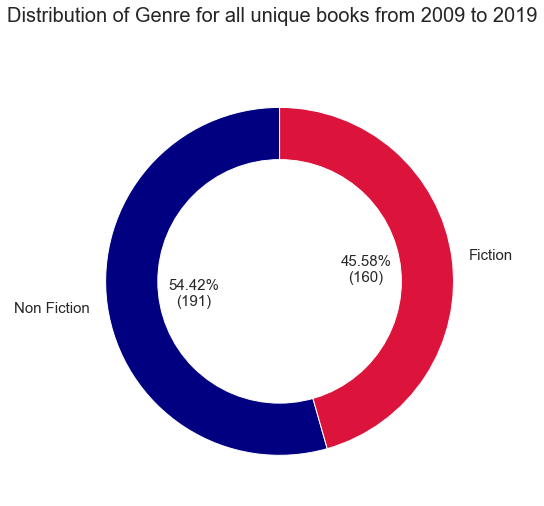

In [16]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = pl.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

In [5]:
g_count.values

array([191, 160], dtype=int64)

In [8]:
df['Year'].unique()

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012],
      dtype=int64)

In [13]:
y1=np.arange(2009,2014)
y2=np.arange(2014,2020)
genre_c=df['Genre'].value_counts()

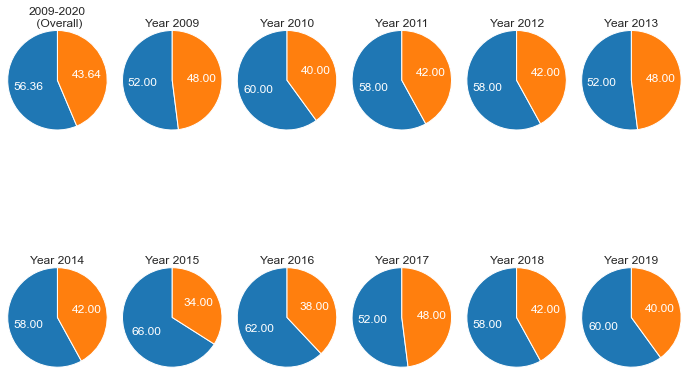

In [44]:
fig,ax=pl.subplots(2,6,figsize=(12,8))
ax[0][0].pie(x=genre_c.values,autopct="%.2f",
            startangle=90,
            textprops={'size':12,'color':'white'},
            radius=1.3)
ax[0][0].set_title("2009-2020\n (Overall)")

for i in range(len(y1)):
    temp_df=df[df['Year']==y1[i]]['Genre'].value_counts()
    ax[0][i+1].pie(x=temp_df.values,autopct="%.2f",
            startangle=90,
            textprops={'size':12,'color':'white'},
            radius=1.3)
    ax[0][i+1].set_title("Year {}".format(y1[i]))
    
for i in range(len(y2)):
    temp_df=df[df['Year']==y2[i]]['Genre'].value_counts()
    ax[1][i].pie(x=temp_df.values,autopct="%.2f",
            startangle=90,
            textprops={'size':12,'color':'white'},
            radius=1.3)
    ax[1][i].set_title("Year {}".format(y2[i]))

pl.show()